<a href="https://colab.research.google.com/github/AhmetA75/TASK6_ABCDE/blob/main/TASK6_ABCDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
!pip install --upgrade kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from time import time
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from numpy import unique, where
from kneed import KneeLocator
from sklearn.decomposition import PCA

In [ ]:
data = pd.read_excel('Temporary_data3_Left_Right_Copy.xlsx')
# print(data.head())

In [ ]:
y = data['CDRGLOB']
# print(f'1 ==> {type(CDRGLOB1)}')
# print(f'2 ==> {type(CDRGLOB)}')
X = data.loc[:, ["NACCMMSE", "RENTM", "INDEPEND","APA"]] # Ichoosed these parameters instead of big dataset because of 
# peformance issues
# print(X.head())

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
# print(y_test)


In [ ]:
decision_tree = DecisionTreeClassifier()  #Selected classifiers
random_forest = RandomForestClassifier()
grad_boost = GradientBoostingClassifier()

In [ ]:
decision_tree.fit(X=x_train, y=y_train) #Classified Features
random_forest.fit(X=x_train, y=y_train)
grad_boost.fit(X=x_train, y=y_train)

GradientBoostingClassifier()

In [ ]:
print(f'TEST ACC DT ==> {decision_tree.score(x_test, y_test)}') #Algorithms fitted
print(f'TEST ACC RF ==> {random_forest.score(x_test, y_test)}')
print(f'TEST ACC GB ==> {grad_boost.score(x_test, y_test)}')

TEST ACC DT ==> 0.6162361623616236
TEST ACC RF ==> 0.6346863468634686
TEST ACC GB ==> 0.7343173431734318


In [ ]:
# parameters reduced two fom five because of pefomance issues
grad_boost_param = {
                    # 'learning_rate': [0.1, 0.2],
                    'learning_rate': [0.1, 0.01],
                    # 'n_estimators': [100, 125, 150, 175, 200],
                    'n_estimators': [10, 300],
                    'max_depth': [3, 50]}


In [ ]:
grid_grad_boost_5 = GridSearchCV(GradientBoostingClassifier(), grad_boost_param, cv=5) # best algoihm fitted grid
start = time() # For working time and tested by cv=5
grid_grad_boost_5.fit(x_train, y_train)
print(f'TIME FOR CV=5 ==> {time() - start}')
print(f'BEST PARAMS FOR GRID GRAD BOOST CV = 5 ==> {grid_grad_boost_5.best_params_}')
print(f'TEST ACC GRID GRAD BOOST CV = 5 ==> {grid_grad_boost_5.score(x_test, y_test)}')

TIME FOR CV=5 ==> 107.21645760536194
BEST PARAMS FOR GRID GRAD BOOST CV = 5 ==> {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
TEST ACC GRID GRAD BOOST CV = 5 ==> 0.7527675276752768


In [ ]:
grid_grad_boost_10 = GridSearchCV(GradientBoostingClassifier(), grad_boost_param, cv=10) # Tested for cv=10
start = time()
grid_grad_boost_10.fit(x_train, y_train)
print(f'TIME FOR CV=10 ==> {time() - start}')
print(f'BEST PARAMS FOR GRID GRAD BOOST CV = 10 ==> {grid_grad_boost_10.best_params_}')
print(f'TEST ACC GRID GRAD BOOST CV = 10 ==> {grid_grad_boost_10.score(x_test, y_test)}')

TIME FOR CV=10 ==> 241.40347027778625
BEST PARAMS FOR GRID GRAD BOOST CV = 10 ==> {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 10}
TEST ACC GRID GRAD BOOST CV = 10 ==> 0.7564575645756457


In [ ]:
# As seen on the models grid silghtly improved our accuracy
# cv=10 more better than cv=5

In [ ]:
def visualize_results(model, x_test, y_test, x_label='NACCMMSE', ylabel='CDRGLOB'):
    """
    prediction and visualize function
    :param model: fitted ML model
    :param x_test: x_test parameter
    :param y_test: y_test parameter
    :param x_label: colmn name in graphic
    :param ylabel: y colmn name
    :return:
    """
    plt.scatter(x_test[x_label], y_test)
    plt.title("Original Test Data")  # title
    plt.xlabel(x_label)  # x label
    plt.ylabel(ylabel)  # y label
    plt.show()

    y_pred = model.predict(x_test)
    plt.scatter(x_test[x_label], y_pred)
    plt.title("Gradient Boost Classifier Predictions")  # title
    plt.xlabel(x_label)  # x label
    plt.ylabel(ylabel)  # y label
    plt.show()

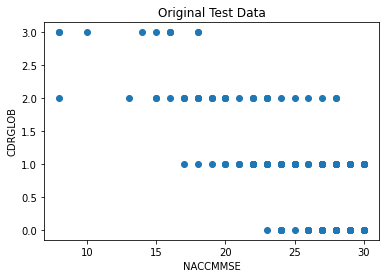

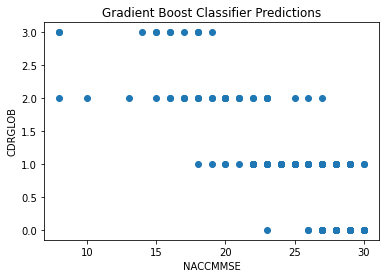

In [ ]:
# visualization
visualize_results(model=grad_boost, x_test=x_test, y_test=y_test)

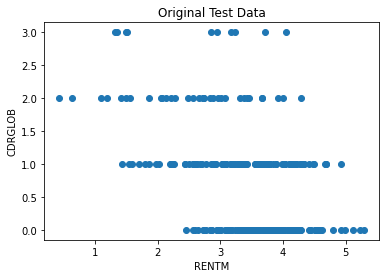

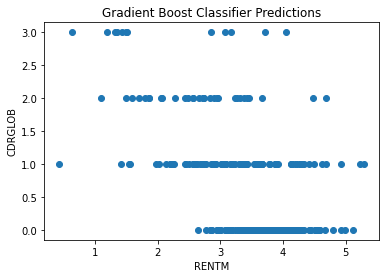

In [ ]:
visualize_results(model=grad_boost, x_test=x_test, y_test=y_test,x_label='RENTM')

In [ ]:
def KMeansClustering(X):
    """
    This function finds the best cluster number and makes clusters leads to elbow method
    :param X: data
    :return:
    """
    md = []

    # np_counts = asarray(counts)
    # X = np_counts.reshape(-1, 1)

    # X = np.asarray(X)

    for i in range(1, 5):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(X)
        o = kmeans.inertia_
        md.append(o)

    plt.plot(range(1, 5), md)
    plt.title('The Elbow Method Graph')
    plt.xlabel('Number of clusters')
    plt.ylabel('MD')
    plt.show()

    kn = KneeLocator(
        range(1, 5),
        md,
        curve='convex',
        direction='decreasing',
        interp_method='polynomial',
    )

    # elbow method =
    n_cluster = kn.knee
    # print(n_cluster)

    model = KMeans(n_clusters=n_cluster)

    model.fit(X)
    # assign a cluster to each example
    yhat = model.predict(X)
    # retrieve unique clusters
    clusters = unique(yhat)
    # create scatter plot for samples from each cluster
    for cluster in clusters:
        # get row indexes for samples with this cluster
        row_ix = where(yhat == cluster)
        # create scatter of these samples
        plt.scatter(X[row_ix, 0], X[row_ix, 1])
    # show the plot
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Clusters - K-Means')
    plt.show()

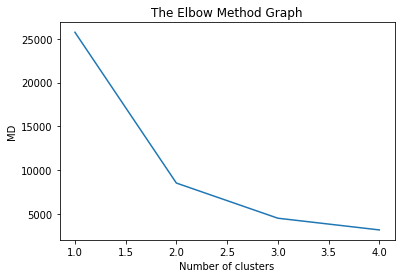

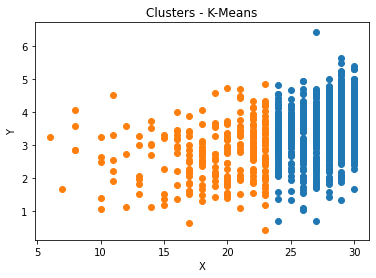

In [ ]:
import warnings as warn
warn.filterwarnings("ignore")

KMeansClustering(X.values)



In [ ]:
def apply_PCA(X, y, visualize=True):
    """
     This function appiles PCA
    :param X: data
    :param y: data labes
    :param visualize: if visualize is True, function visualizes pca results
    :return: pca result df
    """
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data=principalComponents, columns=['PCA_COLUMN_1', 'PCA_COLUMN_2'])

    # VISUALIZE PCA
    if visualize:
        plot = plt.scatter(principalDf['PCA_COLUMN_1'], principalDf['PCA_COLUMN_2'], c=y)
        plt.legend(handles=plot.legend_elements()[0], labels=list(unique(y.values)))
        plt.title("PCA")  # title
        plt.xlabel('PCA_COLUMN_1')  # x label
        plt.ylabel('PCA_COLUMN_2')  # y label
        plt.show()

    return principalDf

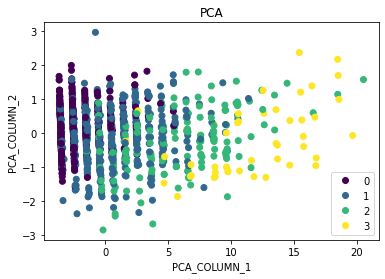

,PCA_COLUMN_1,PCA_COLUMN_2
0,-3.523619,-0.165544
1,7.484205,-0.233310
2,-2.530705,-0.080962
3,-3.503775,-0.396487
4,-0.455903,-0.947261
...,...,...
1349,-2.509019,0.014915
1350,-0.185041,-2.840542
1351,-2.502031,-0.414666
1352,-3.561123,0.270921


In [ ]:
# PCA
apply_PCA(X=X, y=y)